In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path += ["../","../data"]
from memfg.sampler import Sampler
from memfg.dsphdata import dSphData, dSphProp

In [2]:
dSphData.idx_photo_default["cut"] = None
dSphData.idx_photo_default

{'index_col': 0, 'cut': None, 'ra_idx': 'raMean', 'dec_idx': 'decMean'}

In [3]:
dsphdata = dSphData("sample_photo.csv","sample_spec.csv")
dsphprop = dSphProp("Ursa Minor",distance=76000,distance_err=6000)

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (227.28541667, 67.2225, 76000.)>
distance_err = 6000


In [6]:
sampler = Sampler("photo",dsphdata,dsphprop,"exp2d",["re_pc","odds","dra0","dde0"],[100,1,-1e-2,-1e-2],[200,5,1e-2,1e-2])

In [7]:
sampler.run_mcmc_epoch("test.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th Sampling: 100%|██████████| 100/100 [00:20<00:00,  5.10it/s]


In [5]:
sampler.wbic_run_mcmc_epoch("test_wbic.csv",n_burnin=200,n_run=100,n_epoch=5)

4 th WBIC Sampling: 100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


,re_pc,odds,dra0,dde0,lnpost
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,157.261026,1.737233,-0.016844,0.007668,-244212.312196
std,4.874218,0.073331,0.011552,0.004538,1.387937
min,140.249098,1.489529,-0.058557,-0.006504,-244222.889938
25%,153.865250,1.688256,-0.024723,0.004619,-244212.999497
50%,157.197527,1.738598,-0.016070,0.007779,-244212.007158
75%,160.650314,1.786935,-0.008776,0.010683,-244211.309004
max,174.989178,2.018892,0.033432,0.023206,-244210.351177


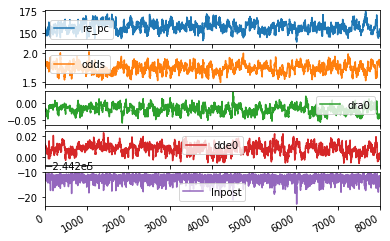

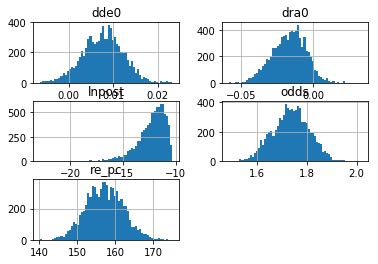

In [8]:
import pandas as pd
df = pd.read_csv("test.csv")
df.plot(subplots=True)
df.hist(bins=64)
df.describe()

,re_pc,odds,dra0,dde0,lngenpost,lnlike
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,159.493049,1.718542,-0.018224,0.007305,-25255.840374,-244229.798693
std,16.809716,0.252466,0.036774,0.013208,1.414384,13.677422
min,101.380327,1.038592,-0.135855,-0.043337,-25265.523026,-244323.432174
25%,147.815197,1.534754,-0.043918,-0.001442,-25256.561436,-244236.771535
50%,158.196339,1.692282,-0.018808,0.005976,-25255.506585,-244226.570883
75%,170.310926,1.892936,0.007251,0.016137,-25254.797849,-244219.717243
max,218.294024,2.855736,0.095643,0.051843,-25253.855269,-244210.602273


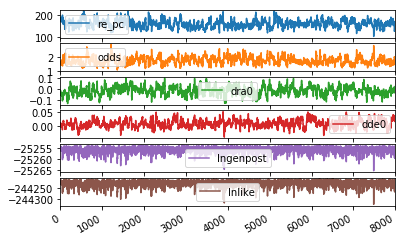

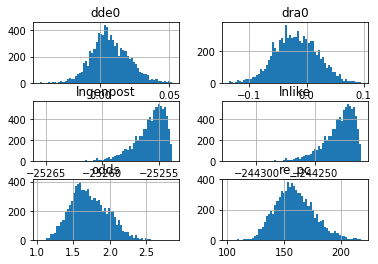

In [9]:
df_wbic = pd.read_csv("test_wbic.csv")
df_wbic.plot(subplots=True)
df_wbic.hist(bins=64)
df_wbic.describe()

In [4]:
sampler = Sampler("spec",dsphdata,dsphprop,"exp2d",
                  ["re_pc","odds","dra0","dde0"],
                  [100,1,-1e-2,-1e-2],[200,5,1e-2,1e-2],
                  paramlims_fname="paramlims.csv",
                  prior_norm_fname="prior_norm.csv")

initialized:
re_pc            200.000000
a                  2.780000
b                  7.780000
g                  0.675000
rhos_Msunpc3       0.008913
rs_pc           9120.108394
R_trunc_pc      2000.000000
dtype: float64
initialized:
Rmax_pc    1207.13611
dtype: float64


In [5]:
sampler.init_sampler()

array([[ 1.70366526e+02,  1.49059799e+00,  4.76580729e-03,
         1.37764044e-03],
       [ 1.71825928e+02,  4.48723623e+00,  6.69039269e-03,
        -1.34531716e-03],
       [ 1.63178641e+02,  4.05787024e+00,  2.49927983e-03,
        -2.46049874e-03],
       [ 1.98252139e+02,  3.66854444e+00, -7.28138123e-03,
         3.25809241e-03],
       [ 1.74631271e+02,  3.47684578e+00,  7.34724594e-03,
         2.07831460e-03],
       [ 1.08576065e+02,  1.40455091e+00, -1.15540632e-03,
        -6.40357209e-03],
       [ 1.54222695e+02,  4.46899876e+00,  7.38395024e-03,
        -8.11258229e-03],
       [ 1.67132912e+02,  2.05785753e+00, -4.14600743e-03,
         5.57770989e-03],
       [ 1.29875049e+02,  1.56416895e+00, -7.15940036e-03,
        -9.29136318e-03],
       [ 1.61981857e+02,  1.09388345e+00, -3.93464347e-03,
         7.43241682e-04],
       [ 1.20999935e+02,  2.78486610e+00, -5.05537290e-03,
        -9.54696532e-03],
       [ 1.59282194e+02,  4.48090881e+00,  5.13662249e-03,
      

In [6]:
sampler.run_mcmc_epoch('test_spec.csv')

Burn in:   0%|          | 0/1000 [00:00<?, ?it/s]

emcee: Exception while calling your likelihood function:
  args: []
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:
  params: [ 1.57004327e+02  2.56033142e+00 -2.14740194e-03 -9.48127623e-03]
  params: [ 1.19863543e+02  4.83642150e+00  4.92724568e-03 -5.07958555e-03]
  params: [ 1.84676629e+02  4.34904151e+00 -8.39454538e-03  4.60566756e-03]
  kwargs: {}
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:
  args: []
  args: []
emcee: Exception while calling your likelihood function:
  kwargs: {}
  params: [ 1.73079336e+02  3.15878434e+00 -9.71611789e-03  2.85036364e-03]
  params: [1.63868544e+02 1.99516311e+00 8.18899781e-03 2.15046921e-03]
  exception:
  kwargs: {}
  args: []
  args: []
  exception:
emcee: Exception while calling your likelihood function:
  params: [ 1.57262514e+02  4.82561184e+00  9.21773400e-03 -5.16031025e-03]
  params: [ 1.95861700e+02  1

Traceback (most recent call last):


  kwargs: {}


Traceback (most recent call last):


  args: []
  exception:
emcee: Exception while calling your likelihood function:
  kwargs: {}


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  args: []
  exception:


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  kwargs: {}
  exception:
emcee: Exception while calling your likelihood function:
  params: [1.93656765e+02 3.08892192e+00 1.05863651e-03 7.92465507e-03]
  kwargs: {}
emcee: Exception while calling your likelihood function:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  args: []


Traceback (most recent call last):
  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
Traceback (most recent call last):
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  params: [ 1.61463569e+02  2.88358212e+00 -3.34668053e-04 -2.52575538e-04]


Traceback (most recent call last):


emcee: Exception while calling your likelihood function:
  kwargs: {}


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  exception:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  exception:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
ValueError: Length of passed values is 4, index implies 17


  params: [ 1.34532641e+02  1.99241248e+00  2.41943776e-03 -5.81039781e-03]


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  args: []


ValueError: Length of passed values is 4, index implies 17
Traceback (most recent call last):
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
Traceback (most recent call last):
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
ValueError: Length of passed values is 4, index implies 17


  exception:
  kwargs: {}
emcee: Exception while calling your likelihood function:


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  params: [ 1.17712318e+02  2.71719862e+00 -4.61503139e-03  1.43513954e-03]


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  exception:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
ValueError: Length of passed values is 4, index implies 17


  args: []
  args: []


Traceback (most recent call last):
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)


  params: [1.00671013e+02 3.84135561e+00 2.32663570e-03 1.63605463e-03]


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
Traceback (most recent call last):
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  kwargs: {}
emcee: Exception while calling your likelihood function:


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
ValueError: Length of passed values is 4, index implies 17
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  args: []


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  exception:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  kwargs: {}
  params: [ 1.31784074e+02  4.33467580e+00 -7.09828218e-03  6.60075467e-03]


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
ValueError: Length of passed values is 4, index implies 17
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)


emcee: Exception while calling your likelihood function:
  exception:
  args: []


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
Traceback (most recent call last):


  kwargs: {}


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  params: [ 1.98827867e+02  4.77730120e+00  2.50183178e-03 -8.58090938e-03]


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
ValueError: Length of passed values is 4, index implies 17


  exception:
  args: []


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
Traceback (most recent call last):


  kwargs: {}


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
ValueError: Length of passed values is 4, index implies 17


emcee: Exception while calling your likelihood function:


ValueError: Length of passed values is 4, index implies 17


  kwargs: {}


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
Traceback (most recent call last):


  exception:


ValueError: Length of passed values is 4, index implies 17
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)


  exception:


  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  params: [1.52919483e+02 1.34518899e+00 9.84149343e-03 3.68463470e-03]


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  args: []


Traceback (most recent call last):


emcee: Exception while calling your likelihood function:


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
Traceback (most recent call last):


  kwargs: {}


ValueError: Length of passed values is 4, index implies 17
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)


  exception:


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)


  params: [1.18851441e+02 2.69815113e+00 2.72810286e-03 7.28596418e-03]


  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
ValueError: Length of passed values is 4, index implies 17
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)


  args: []


  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))


  kwargs: {}


Traceback (most recent call last):
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
ValueError: Length of passed values is 4, index implies 17


  exception:


ValueError: Length of passed values is 4, index implies 17
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_names,params=params)
  File "../memfg/modki17.py", line 139, in array_to_series
    ret = pd.Series(params,index=index)
Traceback (most recent call last):
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/pandas/core/series.py", line 249, in __init__
    .format(val=len(data), ind=len(index)))
  File "/home/gomesu/.pyenv/versions/anaconda3-2018.12/lib/python3.6/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
ValueError: Length of passed values is 4, index implies 17
  File "../memfg/modki17.py", line 186, in lnpost
    sr_params = self.array_to_series(index=self.param_

ValueError: Length of passed values is 4, index implies 17